## ClassifyAnything Part 3-2: Decision Trees

_Supervised learning for classification_

Decision Trees are interpretable algorithms used for supervised classification. They create a tree-like model by recursively splitting the data based on feature values. Each internal node represents a feature test, and the leaf nodes represent the predicted class labels. Decision Trees are easy to interpret and handle both numerical and categorical data. Overfitting can be a concern, but techniques like pruning and ensemble methods (e.g., Random Forests) help address this issue.

### 3-2.1 Import data

In [46]:
# import packages
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

with open("outputs/03_Variables.pkl", 'rb') as file:
    (X_train, X_test, y_train, y_test, kfold) = pickle.load(file)

### 3-2.2 Train the model with cross-validation

In [47]:
# Define the hyperparameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(dt_classifier, param_grid, cv=kfold)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [48]:
# Show the best hyperparameters
for p in best_params:
    print(":\t".join([p,str(best_params[p])]))

criterion:	entropy
max_depth:	20
min_samples_leaf:	2
min_samples_split:	2


### 3-2.3 Visualize fine-tuning of hyperparameters

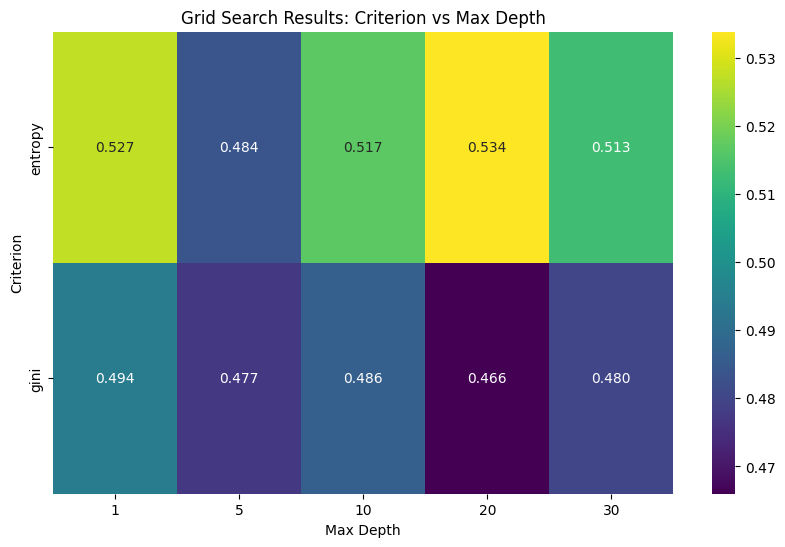

In [49]:
# Access the grid search results
results = pd.DataFrame(grid_search.cv_results_)

# Create a pivot table to reshape the data for the heatmap
pivot_table = results.pivot_table(index='param_criterion', 
                                  columns='param_max_depth', 
                                  values='mean_test_score')

# Create the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".3f")
plt.title('Grid Search Results: Criterion vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Criterion')
plt.show()

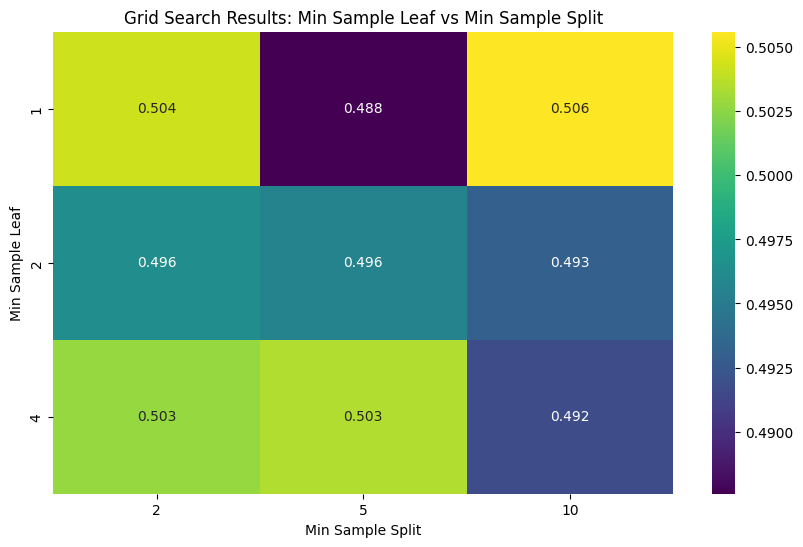

In [50]:
# Create a pivot table to reshape the data for the heatmap
pivot_table = results.pivot_table(index='param_min_samples_leaf', 
                                  columns='param_min_samples_split', 
                                  values='mean_test_score')

# Create the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt=".3f")
plt.title('Grid Search Results: Min Sample Leaf vs Min Sample Split')
plt.xlabel('Min Sample Split')
plt.ylabel('Min Sample Leaf')
plt.show()

### 3-2.4 Visualize decision trees

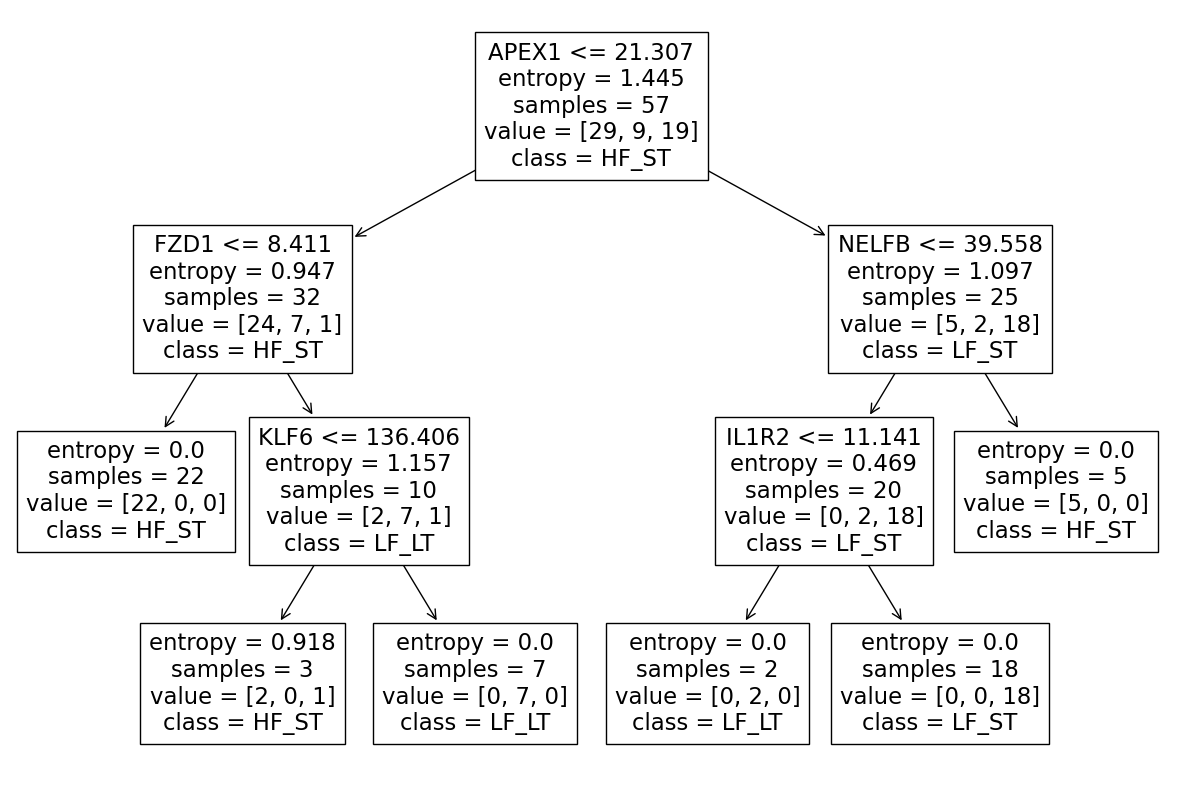

In [51]:
# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(best_model, 
          feature_names=X_train.columns.to_list(),
          class_names=np.unique(y_train.to_list()).tolist())
# Use the line below to verify the label names
# np.unique(y_train.to_list(), return_counts=True)
plt.show()

### 3-2.5 Save the model

In [52]:
import joblib
# Save the final trained model to a file
joblib.dump(best_model, 'outputs/03-2_Decision_Tree_final_model.joblib')

['outputs/03-2_Decision_Tree_final_model.joblib']